In [1]:
%matplotlib inline
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Input, BatchNormalization
#from keras import backend as K
from keras.datasets import mnist
from keras.layers import add

from keras.models import Model
from keras.utils import plot_model
#from keras.utils.visualize_util import plot

from matplotlib import pyplot as plt

import itertools

from sklearn import svm, metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

Using Theano backend.


## 1. Preprocess input data for Keras

In [17]:
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


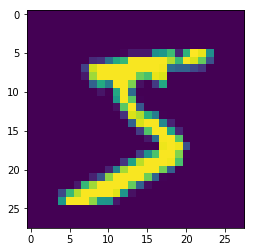

In [19]:
plt.imshow(X_train[0])

In [20]:
K.image_data_format()

NameError: name 'K' is not defined

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## 2. Preprocess class labels for Keras

In [23]:
print(y_train.shape)

(60000,)


In [24]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [25]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes=10)
Y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [26]:
print(Y_train.shape)

(60000, 10)


## 3. Define model architecture: Conv2D and Dense layers

In [27]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## 4. Compile model

In [14]:
model.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 5. Fit model

In [ ]:
model.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    Y_train,
    # Iterations to be run if not stopped by EarlyStopping
    epochs=100,
    callbacks=[
        EarlyStopping(monitor='val_loss',patience=5),
        ModelCheckpoint(
            'mnist_model.hdf5',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=1,
    validation_split=0.1,
    batch_size=32, 
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
 1184/54000 [..............................] - ETA: 291659s - loss: 1.2288 - acc: 0.5971

In [ ]:
model.summary()

## 6. Train evaluation

In [15]:
#Evaluate
model.load_weights("mnist_model.hdf5")
score_train = model.evaluate(X_train, Y_train, verbose=0)
print("loss:%0.4f"%score_train[0])
print("accuracy:%0.4f"%score_train[1])

OSError: Unable to open file (Unable to open file: name = 'mnist.model', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [58]:
# Predict classes
model.load_weights("mnist_model.hdf5")
y_train_preds = model.predict_classes(X_train)

59968/60000 [============================>.] - ETA: 0s

In [99]:
#sklearn accuracy score
accuracy_score(y_train, y_train_preds)

0.99781666666666669

In [108]:
#sklearn precision score
precision_score(y_train, y_train_preds,average=None)

array([ 0.99814534,  0.99925684,  0.99949495,  0.99690856,  0.99743502,
        0.99870586,  0.99831224,  0.99255032,  0.99948595,  0.9981444 ])

In [110]:
#sklearn recall
recall_score(y_train, y_train_preds,average=None)

array([ 0.9994935 ,  0.99718185,  0.99647533,  0.99934758,  0.99845943,
        0.99649511,  0.99949307,  0.99952115,  0.9969236 ,  0.99462094])

### Confusion matrix

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5920    0    0    0    0    0    2    0    0    1]
 [   0 6723    1    0    0    0    1   15    1    1]
 [   2    2 5937    3    0    0    0   14    0    0]
 [   0    0    1 6127    0    0    0    2    0    1]
 [   1    2    0    0 5833    0    0    2    0    4]
 [   1    0    0   11    0 5402    6    0    1    0]
 [   1    0    0    0    0    2 5915    0    0    0]
 [   0    1    0    0    2    0    0 6262    0    0]
 [   3    0    1    3    1    4    1    1 5833    4]
 [   3    0    0    2   12    1    0   13    1 5917]]


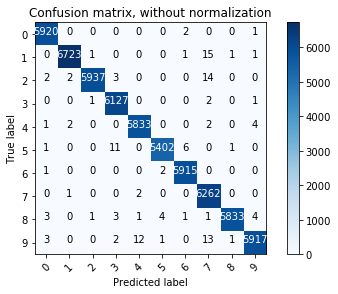

In [72]:
confMatrix = confusion_matrix(y_train, y_train_preds)
plot_confusion_matrix(confMatrix, classes=[0,1,2,3,4,5,6,7,8,9],
                        title='Confusion matrix, without normalization')

## 7. Test evaluation

In [74]:
#Evaluate
score_test = model.evaluate(X_test, Y_test, verbose=0)
print("loss:%0.4f"%score_train[0])
print("accuracy:%0.4f"%score_train[1])

loss:0.0071
accuracy:0.9978


In [77]:
#Predict classes
model.load_weights("mnist_model.hdf5")
y_test_preds = model.predict_classes(X_test)

 9952/10000 [============================>.] - ETA: 0s

In [112]:
#sklearn accuracy score
accuracy_score(y_test, y_test_preds)

0.99180000000000001

In [113]:
#sklearn precision score
precision_score(y_test, y_test_preds,average=None)

array([ 0.98984772,  0.99471366,  0.99319728,  0.99015748,  0.99190283,
        0.98992161,  0.99474238,  0.98176583,  0.9968815 ,  0.99499499])

In [114]:
#sklearn recall
recall_score(y_test, y_test_preds,average=None)

array([ 0.99489796,  0.99471366,  0.99031008,  0.9960396 ,  0.99796334,
        0.99103139,  0.9874739 ,  0.99513619,  0.98459959,  0.9851338 ])

Confusion matrix, without normalization
[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1129    3    1    0    0    1    1    0    0]
 [   1    0 1022    1    0    0    0    8    0    0]
 [   0    0    0 1006    0    1    0    2    1    0]
 [   0    0    0    0  980    0    1    0    0    1]
 [   2    0    0    5    0  884    1    0    0    0]
 [   4    3    0    1    1    3  946    0    0    0]
 [   0    1    2    1    0    0    0 1023    1    0]
 [   2    1    2    1    1    2    0    2  959    4]
 [   1    0    0    0    6    3    0    5    0  994]]


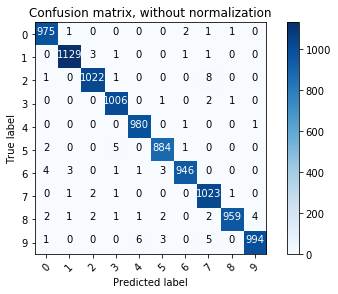

In [115]:
#Confusion matrix
confMatrix = confusion_matrix(y_test, y_test_preds)
plot_confusion_matrix(confMatrix, classes=[0,1,2,3,4,5,6,7,8,9],
                        title='Confusion matrix, without normalization')

## 3.2 Define an other model architecture: Dense layers

In [117]:
input_shape = (28, 28,1)
modeld = Sequential()
modeld.add(Flatten(input_shape=input_shape))
modeld.add(Dense(128, activation='relu'))
modeld.add(Dropout(0.5))
modeld.add(Dense(Y_train.shape[1], activation='softmax'))

In [118]:
modeld.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [121]:
modeld.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    Y_train,
    # Iterations to be run if not stopped by EarlyStopping
    epochs=100,
    callbacks=[
        EarlyStopping(monitor='val_loss',patience=5),
        ModelCheckpoint(
            'mnist_model2.hdf5', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=1,
    validation_split=0.1,
    batch_size=32, 
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 11s - loss: 0.4145 - acc: 0.8767 - val_loss: 0.1422 - val_acc: 0.9615
Epoch 2/100
54000/54000 [==============================] - 9s - loss: 0.2302 - acc: 0.9328 - val_loss: 0.1102 - val_acc: 0.9692
Epoch 3/100
54000/54000 [==============================] - 9s - loss: 0.1920 - acc: 0.9419 - val_loss: 0.0933 - val_acc: 0.9733
Epoch 4/100
54000/54000 [==============================] - 10s - loss: 0.1692 - acc: 0.9493 - val_loss: 0.0859 - val_acc: 0.9747
Epoch 5/100
54000/54000 [==============================] - 10s - loss: 0.1522 - acc: 0.9542 - val_loss: 0.0807 - val_acc: 0.9768
Epoch 6/100
54000/54000 [==============================] - 10s - loss: 0.1417 - acc: 0.9567 - val_loss: 0.0773 - val_acc: 0.9805
Epoch 7/100
54000/54000 [==============================] - 9s - loss: 0.1347 - acc: 0.9582 - val_loss: 0.0751 - val_acc: 0.9778
Epoch 8/100
54000/54000 [==========================

In [123]:
modeld.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 101,770.0
Trainable params: 101,770.0
Non-trainable params: 0.0
_________________________________________________________________


## Evaluation function

In [195]:
def sklearn_evaluations(X,y,model,model_name):
    # Predict classes
    model.load_weights(model_name)
    y_preds = model.predict_classes(X)
    #sklearn accuracy score
    print("\nAccuracy:%0.4f"%accuracy_score(y, y_preds))
    #sklearn precision score
    print("Precision:")
    print(precision_score(y, y_preds,average=None))
    #sklearn recall
    print("Recall:")
    print(recall_score(y, y_preds,average=None))
    #Confusion matrix
    confMatrix = confusion_matrix(y, y_preds)
    plot_confusion_matrix(confMatrix, classes=[0,1,2,3,4,5,6,7,8,9],
                        title='Confusion matrix, without normalization')

## 6. Train evaluation

59776/60000 [============================>.] - ETA: 0s
Accuracy:0.9883
Precision:
[ 0.9947582   0.99317406  0.99221395  0.98719632  0.9922534   0.98293891
  0.99508475  0.98213156  0.98229184  0.98046745]
Recall:
[ 0.99324667  0.99273213  0.98388721  0.98091665  0.98664841  0.98837853
  0.99205813  0.99138069  0.9859853   0.98722474]
Confusion matrix, without normalization
[[5883    0    2    1    2    3    8    2   18    4]
 [   1 6693    8    7    2    1    0   11   16    3]
 [   7    5 5862   15    9    1    1   37   19    2]
 [   1    0   12 6014    0   44    1   24   22   13]
 [   2   12    5    0 5764    0    3    4    3   49]
 [   4    0    2   20    3 5358   13    4    9    8]
 [   7    4    0    0    8   19 5871    0    9    0]
 [   1    8   11    3    5    2    0 6211    1   23]
 [   4   15    6   16    2   15    2    7 5769   15]
 [   4    2    0   16   14    8    1   24    7 5873]]


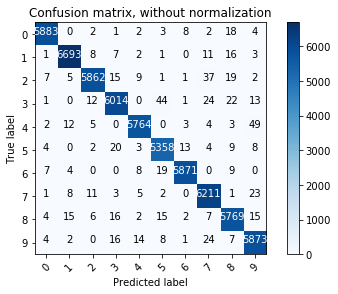

In [137]:
sklearn_evaluations(X_train,y_train,modeld,"mnist_model.hdf5")

## 7. Test evaluation

 9216/10000 [==========================>...] - ETA: 0s
Accuracy:0.9774
Precision:
[ 0.9837233   0.98683055  0.9813176   0.97435897  0.97948718  0.96909492
  0.98417722  0.96721311  0.97722567  0.96945813]
Recall:
[ 0.98673469  0.99030837  0.96705426  0.97821782  0.97250509  0.98430493
  0.97390397  0.97568093  0.96919918  0.97522299]
Confusion matrix, without normalization
[[ 967    0    2    2    1    2    3    1    2    0]
 [   0 1124    3    3    0    1    1    0    3    0]
 [   4    0  998    5    5    0    2   12    6    0]
 [   0    0    2  988    0   10    0    6    2    2]
 [   0    1    3    0  955    0    4    2    2   15]
 [   2    0    0    3    0  878    3    0    3    3]
 [   3    3    0    1    6    7  933    1    4    0]
 [   1    5    8    3    0    0    0 1003    0    8]
 [   5    1    1    5    3    5    1    6  944    3]
 [   1    5    0    4    5    3    1    6    0  984]]


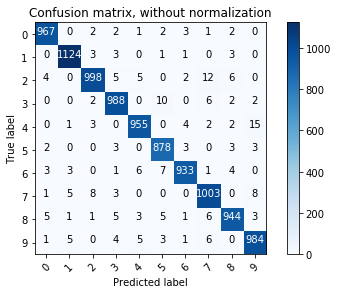

In [138]:
sklearn_evaluations(X_test,y_test,modeld,"mnist_model.hdf5")

## 3.3 Define model architecture: ResNet/HighwayNet

In [28]:
def conv_block(feat_maps_out, prev):
    prev = BatchNormalization(axis=1)(prev) # Specifying the axis and mode allows for later merging
    prev = Activation('relu')(prev)
    prev = Conv2D(feat_maps_out, (3, 3), padding='same')(prev) 
    prev = BatchNormalization(axis=1)(prev) # Specifying the axis and mode allows for later merging
    prev = Activation('relu')(prev)
    prev = Conv2D(feat_maps_out, (3, 3), padding='same')(prev) 
    return prev

def skip_block(feat_maps_in, feat_maps_out, prev):
    if feat_maps_in != feat_maps_out:
        # This adds in a 1x1 convolution on shortcuts that map between an uneven amount of channels
        prev = Conv2D(feat_maps_out, (1, 1), padding='same')(prev)
    return prev 

def Residual(feat_maps_in, feat_maps_out, prev_layer):
    '''
    A customizable residual unit with convolutional and shortcut blocks
    Args:
      feat_maps_in: number of channels/filters coming in, from input or previous layer
      feat_maps_out: how many output channels/filters this block will produce
      prev_layer: the previous layer
    '''

    skip = skip_block(feat_maps_in, feat_maps_out, prev_layer)
    conv = conv_block(feat_maps_out, prev_layer)
    
    merged = add([skip,conv])

    print('Residual block mapping '+str(feat_maps_in)+' channels to '+str(feat_maps_out)+' channels built')
    return merged # the residual connection

In [79]:
img_rows = X_train.shape[1]  
img_cols = X_train.shape[2] 

inp = Input((img_rows, img_cols,1))
cnv1 = Conv2D(32, (3, 3), strides=[2,2], activation='relu', padding='same')(inp)#28*28/4=196 ami = 14*14
r1 = Residual(32, 128, cnv1)
# An example residual unit coming after a convolutional layer. NOTE: the above residual takes the 64 output
# channels from the Convolutional2D layer as the first argument to the Residual function
r2 = Residual(128, 128, r1)
r3 = Residual(128, 256, r2)
cnv2 = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(r3)
# mintában a fenti conv2 volt az output, de shape probléma volt, így a következő 2 sort tettem bele, így a fit elkezdett futni
fl = Flatten()(cnv2)
out = Dense(10)(fl)
#out = Convolution2D(10,1, activation='sigmoid')(r3)

modelr = Model(inputs=inp, outputs=out)

modelr.compile(optimizer=optimizers.Adam(), loss='mean_squared_error')

Residual block mapping 32 channels to 128 channels built
Residual block mapping 128 channels to 128 channels built
Residual block mapping 128 channels to 256 channels built


In [80]:
plot_model(modelr, to_file='model.png',show_shapes=True)

In [81]:
X_train.shape

(60000, 28, 28, 1)

In [82]:
Y_train.shape

(60000, 10)

In [83]:
modelr.fit(
    # Feature matrix
    X_train, 
    # Target class one-hot-encoded
    Y_train,
    # Iterations to be run if not stopped by EarlyStopping
    epochs=100,
    callbacks=[
        EarlyStopping(monitor='val_loss',patience=5),
        ModelCheckpoint(
            'mnist_residualmodel.hdf5', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=1,
    validation_split=0.1,
    batch_size=32, 
)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
   64/54000 [..............................] - ETA: 3119s - loss: 0.2940

KeyboardInterrupt: 

# Trash

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow.contrib.slim as slim

In [ ]:
total_layers = 25 #Specify how deep we want our network
units_between_stride = int(total_layers / 5) ####must be integer

In [ ]:
def resUnit(input_layer,i):
    with tf.variable_scope("res_unit"+str(i),reuse=None):
        part1 = slim.batch_norm(input_layer,activation_fn=None)
        part2 = tf.nn.relu(part1)
        part3 = slim.conv2d(part2,64,[3,3],activation_fn=None)
        part4 = slim.batch_norm(part3,activation_fn=None)
        part5 = tf.nn.relu(part4)
        part6 = slim.conv2d(part5,64,[3,3],activation_fn=None)
        output = input_layer + part6
        return output

In [ ]:
tf.reset_default_graph()

In [ ]:
input_layer = tf.placeholder(shape=[None,28,28,1],dtype=tf.float32,name='input') #X_test hova?
label_layer = tf.placeholder(shape=[None],dtype=tf.int32) #y_test hova?
label_oh = slim.layers.one_hot_encoding(label_layer,10)

In [ ]:
layer1 = slim.conv2d(input_layer,64,[3,3],normalizer_fn=slim.batch_norm,scope='conv_'+str(0),reuse=None)
for i in range(5):
    for j in range(units_between_stride):
        layer1 = resUnit(layer1,j + (i*units_between_stride))
    layer1 = slim.conv2d(layer1,64,[3,3],stride=[2,2],normalizer_fn=slim.batch_norm,scope='conv_s_'+str(i))
    
top = slim.conv2d(layer1,10,[3,3],normalizer_fn=slim.batch_norm,activation_fn=None,scope='conv_top')

output = slim.layers.softmax(slim.layers.flatten(top))

loss = tf.reduce_mean(-tf.reduce_sum(label_oh * tf.log(output) + 1e-10, reduction_indices=[1]))
trainer = tf.train.AdamOptimizer(learning_rate=0.001)
update = trainer.minimize(loss)

### Valami más

In [ ]:
# Generate Predictions
predictions = {
  "classes": tf.argmax(
      input=logits, axis=1),
  "probabilities": tf.nn.softmax(
      logits, name="softmax_tensor")

In [240]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [241]:
accuracy_validation = slim.metrics.accuracy(tf.to_int32(tf.argmax(predictions_validation, 1)), tf.to_int32(tf.argmax(labels_validation, 1)))
  accuracy_test = slim.metrics.accuracy(tf.to_int32(tf.argmax(predictions_test, 1)), tf.to_int32(tf.argmax(labels_test, 1)))

IndentationError: unexpected indent (<ipython-input-241-3eb8a88b84d1>, line 2)